In [101]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import math
import random
from IPython import display

np.random.seed(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14364\472520188.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=20)


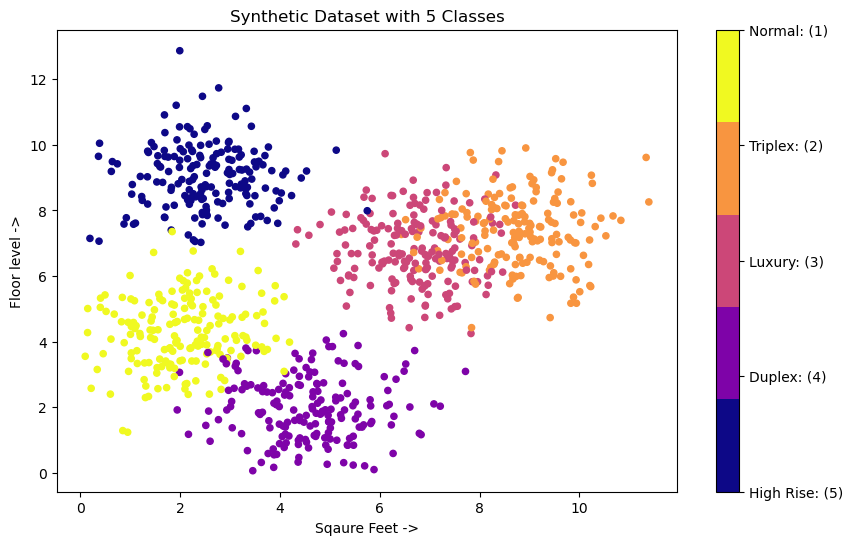

In [123]:
ns = 900
nf = 2
nc = 5
rs = 42

x,y = make_blobs(n_samples=ns,n_features=nf, centers=nc, random_state=rs)
x = abs(x)
y = abs(y)

x_train, x_test, y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

classNames = ['Normal: (1)','Triplex: (2)','Luxury: (3)','Duplex: (4)','High Rise: (5)']
plt.figure(figsize=(10,6))
scatter = plt.scatter(x[:,0],x[:,1], c=y,cmap=plt.cm.get_cmap('plasma',nc), marker='o', s=20)
#plt.xlim(1, 200) 
#plt.ylim(1, 30)
cbar = plt.colorbar(scatter, ticks=range(nc))
cbar.set_ticklabels(classNames[::-1])
plt.title('Synthetic Dataset with 5 Classes')
plt.xlabel('Sqaure Feet ->')
plt.ylabel('Floor level ->')

plt.show()

In [91]:
x_train

array([[8.40515236, 7.57201766],
       [2.31013793, 8.41406925],
       [7.45080618, 6.30752681],
       ...,
       [1.83940379, 5.53632798],
       [8.24357341, 8.17693847],
       [5.12088807, 2.19705371]])

In [92]:
y_train

array([2, 0, 2, 4, 1, 1, 0, 3, 0, 4, 3, 4, 0, 3, 3, 4, 2, 0, 0, 2, 2, 1,
       1, 0, 2, 2, 0, 1, 4, 2, 0, 2, 1, 1, 1, 4, 2, 1, 2, 4, 0, 4, 3, 0,
       1, 1, 4, 0, 2, 3, 2, 1, 0, 3, 4, 4, 4, 0, 1, 2, 1, 2, 4, 1, 3, 2,
       2, 1, 1, 2, 1, 1, 0, 0, 1, 4, 3, 0, 3, 3, 4, 2, 1, 2, 4, 3, 3, 1,
       3, 2, 1, 2, 3, 4, 3, 4, 3, 3, 2, 2, 2, 4, 1, 0, 4, 4, 1, 3, 3, 0,
       2, 4, 3, 0, 1, 0, 4, 1, 1, 0, 3, 3, 0, 3, 3, 4, 2, 0, 3, 2, 4, 1,
       4, 1, 1, 0, 0, 3, 1, 4, 1, 0, 4, 1, 4, 1, 4, 1, 1, 0, 4, 2, 1, 1,
       1, 4, 2, 4, 4, 0, 0, 0, 0, 4, 0, 4, 3, 0, 1, 0, 0, 3, 3, 2, 3, 4,
       4, 4, 2, 0, 2, 4, 3, 1, 2, 0, 1, 3, 3, 1, 0, 0, 4, 1, 0, 0, 1, 4,
       2, 2, 2, 2, 4, 4, 2, 0, 0, 0, 1, 3, 4, 1, 2, 4, 1, 2, 2, 1, 3, 0,
       3, 0, 3, 2, 0, 2, 3, 0, 3, 2, 0, 1, 1, 3, 0, 3, 3, 2, 0, 2, 3, 3,
       0, 2, 3, 4, 2, 2, 3, 2, 4, 3, 0, 3, 2, 4, 1, 4, 2, 0, 2, 3, 3, 2,
       4, 4, 4, 4, 4, 2, 1, 1, 4, 4, 2, 0, 3, 3, 1, 0, 0, 0, 4, 4, 4, 4,
       1, 3, 3, 4, 4, 2, 3, 1, 0, 1, 0, 0, 4, 3, 2,

In [93]:
x_test

array([[ 1.6875249 ,  3.75780309],
       [ 4.370472  ,  2.69071194],
       [ 2.62484591,  8.71318243],
       [ 6.91431208,  6.64589486],
       [ 7.82902608,  4.24772753],
       [ 9.20328049,  6.48431325],
       [ 4.18981336,  2.59601962],
       [ 4.15227261,  1.5406115 ],
       [ 5.56605638,  3.88258632],
       [ 9.54031944,  6.660622  ],
       [ 3.33540934,  2.64284223],
       [ 2.60193341,  4.48724787],
       [ 2.18503127,  8.88414307],
       [ 6.68310602,  6.17110584],
       [ 4.60224413,  3.07647157],
       [ 6.25781723,  8.45033431],
       [ 5.12894273,  9.83618863],
       [ 5.68458056,  8.4032965 ],
       [ 6.10792848,  9.72865221],
       [ 1.03130358,  8.49601591],
       [ 8.85796556,  7.87601287],
       [ 8.90992902,  7.28630068],
       [ 2.82446687,  9.77325535],
       [ 3.69220474,  4.55612309],
       [ 2.21612515,  8.29993471],
       [ 2.54502366, 10.57892978],
       [ 4.68840046,  1.14221957],
       [ 3.35944948,  3.72796387],
       [ 7.08563082,

In [94]:
y_test

array([4, 1, 0, 2, 2, 3, 1, 1, 1, 3, 1, 4, 0, 2, 1, 2, 0, 2, 2, 0, 3, 3,
       0, 4, 0, 0, 1, 1, 1, 3, 0, 1, 0, 4, 0, 0, 3, 1, 2, 2, 1, 4, 0, 1,
       2, 1, 2, 0, 3, 2, 1, 1, 1, 0, 4, 1, 4, 4, 4, 2, 0, 2, 0, 3, 2, 3,
       2, 1, 1, 1, 3, 3, 3, 2, 2, 3, 3, 1, 2, 0, 0, 4, 0, 1, 2, 4, 3, 0,
       1, 0, 1, 4, 0, 0, 3, 3, 2, 1, 1, 3, 3, 2, 4, 2, 3, 1, 4, 2, 4, 4,
       3, 3, 2, 3, 0, 0, 0, 2, 2, 2, 3, 4, 4, 0, 2, 2, 4, 4, 2, 4, 4, 0,
       4, 3, 3, 0, 0, 2, 2, 0, 2, 2, 3, 0, 4, 1, 0, 2, 2, 0, 2, 4, 4, 0,
       4, 2, 1, 3, 0, 2, 4, 2, 3, 1, 0, 4, 1, 1, 0, 4, 0, 3, 0, 0, 2, 1,
       0, 0, 1, 4])

In [95]:
print("Shapes of Each Data :")
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shapes of Each Data :
(720, 2)
(720,)
(180, 2)
(180,)


In [96]:
class NeuralNetwork(object):
    def __init__(self) :
        iLn = 2
        hLN1 = 100
        hLN2 = 100
        hLN3 = 100
        oLn = nc
        self.eta = 0.1

        self.wHL1 = np.random.randn(iLn,hLN1)
        self.wHL2 = np.random.randn(hLN1,hLN2)
        self.wHL3 = np.random.randn(hLN2,hLN3)
        self.WO = np.random.randn(hLN3,oLn)

        self.b1 = np.zeros((1,hLN1))
        self.b2 = np.zeros((1,hLN2))
        self.b3 = np.zeros((1,hLN3))
        self.WB = np.zeros((1,oLn))


    def ForwardProp(self,x) :        
        self.HO1 = self.sigmoid(np.dot(x, self.wHL1) + self.b1)
        self.HO2 = self.sigmoid(np.dot(self.HO1, self.wHL2) + self.b2)
        self.HO3 = self.sigmoid(np.dot(self.HO2, self.wHL3) + self.b3)
        self.output = self.softmax((np.dot(self.HO3, self.WO) + self.WB))
        
        return self.output

    def BackProp(self,x,outputValues) :
        m = x.shape[0]
        
        diff_out = self.output - outputValues
        d_WO = (1/m) * np.dot(self.HO3.T, diff_out)
        d_WB = (1/m) * np.sum(diff_out, axis=0, keepdims=True)
        
        d_hidden3 = np.dot(diff_out, self.WO.T) * self.sigmoid_dev(self.HO3)
        d_W_HI3 = (1/m) * np.dot(self.HO2.T, d_hidden3)
        d_b3 = (1/m) * np.sum(d_hidden3, axis=0, keepdims=True)
        
        d_hidden2 = np.dot(d_hidden3, self.wHL3.T) * self.sigmoid_dev(self.HO2)
        d_W_HI2 = (1/m) * np.dot(self.HO1.T, d_hidden2)
        d_b2 = (1/m) * np.sum(d_hidden2, axis=0, keepdims=True)
        
        d_hidden1 = np.dot(d_hidden2, self.wHL2.T) * self.sigmoid_dev(self.HO1)
        d_W_HI1 = (1/m) * np.dot(x.T, d_hidden1)
        d_b1 = (1/m) * np.sum(d_hidden1, axis=0, keepdims=True)
        
    #Updating the neural layer's weights and biases
        self.WO -= self.eta * d_WO
        self.WB -= self.eta * d_WB
        self.wHL3 -= self.eta * d_W_HI3
        self.b3 -= self.eta * d_b3
        self.wHL2 -= self.eta * d_W_HI2
        self.b2 -= self.eta * d_b2
        self.wHL1 -= self.eta * d_W_HI1
        self.b1 -= self.eta * d_b1


    def sigmoid(self,x) :
        return 1/(1 + np.exp(-x))

    def sigmoid_dev(self,x):
        return x * (1-x)
    
    def softmax(self, x):
        exp_scores = np.exp(x)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    def predict(self, x):
        probabilities = self.ForwardProp(x)
        return np.argmax(probabilities, axis=1)
    
    def ReLU(x,ok=False):
        if ok == True :
            return np.maximum(0, x)
        else :
            return np.where(x <= 0, 0, 1)


In [97]:
def accuracy(y_true,y_pred):

    correct = np.sum(y_true == y_pred)
    total = len(y_true)
    ac = correct / total * 100

    return ac
    

In [98]:
NN = NeuralNetwork()

In [99]:
# for multiple class i have encoded the output number if nth classes
def one_hot_encode(y, num_classes):
    return np.eye(num_classes)[y]

y_train_one_hot = one_hot_encode(y_train, nc)

Epoch 0,Loss: 0.3487401505972084
Epoch 100,Loss: 0.31290528703970416
Epoch 200,Loss: 0.29525283183361123
Epoch 300,Loss: 0.2837698175813373
Epoch 400,Loss: 0.2751987229561722
Epoch 500,Loss: 0.2682236706797876
Epoch 600,Loss: 0.2622246050995482
Epoch 700,Loss: 0.2568841705861902
Epoch 800,Loss: 0.25198343333578904
Epoch 900,Loss: 0.24742223124084617
Epoch 1000,Loss: 0.24325055746249988
Epoch 1100,Loss: 0.2394762953898346
Epoch 1200,Loss: 0.23602777274349837
Epoch 1300,Loss: 0.2328283197090918
Epoch 1400,Loss: 0.22982459076902662
Epoch 1500,Loss: 0.22698321552512377
Epoch 1600,Loss: 0.22427969881695603
Epoch 1700,Loss: 0.22168687186845007
Epoch 1800,Loss: 0.2191690745286468
Epoch 1900,Loss: 0.21669818777027963
Epoch 2000,Loss: 0.2143003106794094
Epoch 2100,Loss: 0.2120624892006854
Epoch 2200,Loss: 0.21001075643766956
Epoch 2300,Loss: 0.2080758564315074
Epoch 2400,Loss: 0.20620864083903168
Epoch 2500,Loss: 0.20440796786036874
Epoch 2600,Loss: 0.20268778789074332
Epoch 2700,Loss: 0.201056

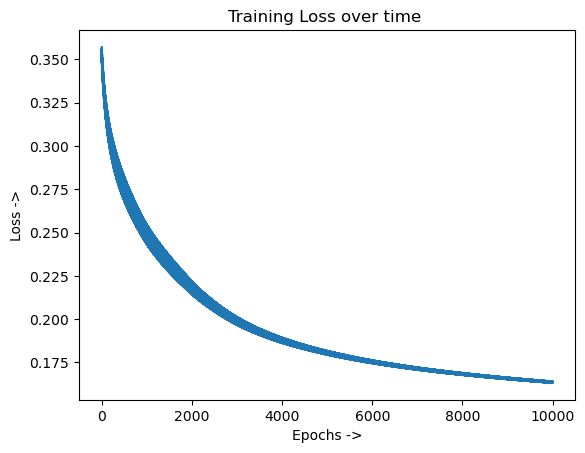

In [124]:
#Training phrase starts
err = []

epochs = 10000

for i in range(epochs):
    output = NN.ForwardProp(x_train)
    NN.BackProp(x_train, y_train_one_hot)
    
#Calculating loss using cross-entropy
    loss = np.mean(-np.sum(y_train_one_hot * np.log(output), axis=1))
    err.append(loss)
    
    if i % 100 == 0:
        print(f'Epoch {i},Loss: {loss}')
        
plt.plot(err)
plt.xlabel('Epochs ->')
plt.ylabel('Loss ->')
plt.title('Training Loss over time ')
plt.show()


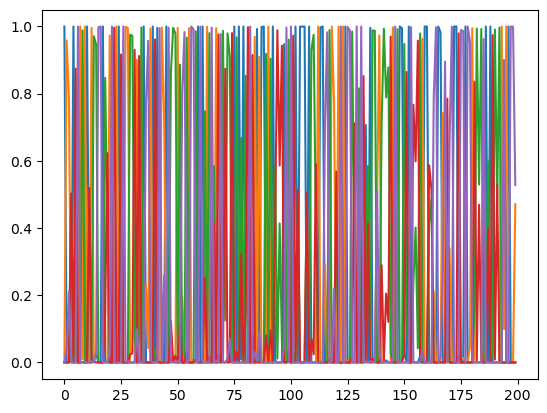

In [ ]:
# testing
yPred = NN.ForwardProp(x_test)
plt.plot(yPred)

In [ ]:
# test 1

test1 = NN.ForwardProp([[10, 10]])

predicted_class = np.argmax(test1)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test1[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test1[0][predicted_class]:.4f})")



Classes with Probabilities:

Class 1 (Normal: (1)): 0.0002
Class 2 (Triplex: (2)): 0.0000
Class 3 (Luxury: (3)): 0.0325
Class 4 (Duplex: (4)): 0.9673
Class 5 (High Rise: (5)): 0.0000

Predicted Class:
Duplex: (4) (0.9673)


In [ ]:
# test 2
test2 = NN.ForwardProp([[5, 5]])

predicted_class = np.argmax(test2)

print("Classes with Probabilities:\n")
for i, name in enumerate(classNames):
    print(f"Class {i+1} ({name}): {test2[0][i]:.4f}")

print("\nPredicted Class:")
print(f"{classNames[predicted_class]} ({test2[0][predicted_class]:.4f})")

Classes with Probabilities:

Class 1 (Normal: (1)): 0.0001
Class 2 (Triplex: (2)): 0.1959
Class 3 (Luxury: (3)): 0.7140
Class 4 (Duplex: (4)): 0.0004
Class 5 (High Rise: (5)): 0.0897

Predicted Class:
Luxury: (3) (0.7140)


In [125]:
acc = accuracy(y_train,yPred)
print(acc)

0.0


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14364\1050866761.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  return np.mean(y_true == y_pred)
